# OCSVM Parameter Demo
**Description**   

Minimal demo to demonstrate the effects of hyperparameters `nu` and `gamma` on outlier dectection using OCSVM with RBF Kernel.

**Data Sources**   
- Generated dummy data

**Sources**
- Inspired by: https://scikit-learn.org/stable/auto_examples/plot_anomaly_comparison.html

### Imports

In [1]:
# Extra
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn import svm
from sklearn.datasets import make_blobs

In [2]:
%matplotlib inline
%run utils.ipynb
utils_set_output_style()

### Configuration

In [3]:
# Hyperparameters to use for different plots
nus = [0.1, 0.1, 0.25, 0.25]
gammas = [0.1, 0.04, 0.04, 0.5]

### Classify and plot Dummy Data

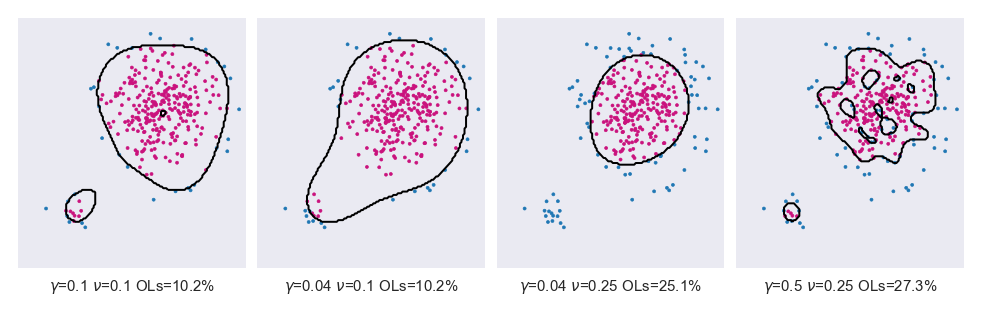

In [4]:
# Define dataset
inliers = make_blobs(
    centers=[[2, 2]], cluster_std=[1.7], random_state=0, n_samples=300, n_features=2
)
outliers = make_blobs(
    centers=[[-4, -4]], cluster_std=[0.5], random_state=0, n_samples=15, n_features=2
)
X = np.vstack([inliers[0], outliers[0]])

# Make gridspace four outlining classification bounderies
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

plt.figure(figsize=(5.473, 1.45), dpi=180)
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.05
)

# Plot subcharts for all varients
for i, (nu, gamma) in enumerate(zip(nus, gammas)):
    # Fit model
    ocsvm = svm.OneClassSVM(nu=nu, kernel="rbf", gamma=gamma)
    y_pred = ocsvm.fit(X).predict(X)

    # Calc some metrics
    frac_outliers = (y_pred == -1).sum() / len(y_pred)

    # Start Plotting
    plt.subplot(1, 4, i + 1)

    # Plot contour line by predicting raster values
    Z = ocsvm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], linewidths=0.8, colors="black")

    # Scatter plot and metrics
    cmap = colors.ListedColormap(["tab:blue", (202 / 255, 18 / 255, 125 / 255)])

    plt.scatter(X[:, 0], X[:, 1], s=1.5, color=cmap((y_pred + 1) // 2))
    plt.xlim(-7, 7)
    plt.ylim(-7, 7)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(
        r"$\gamma$={}$\ $$\nu$={}$\ $OLs={:.1f}%".format(gamma, nu, frac_outliers * 100)
    )

# Save to Latex Graphics Dir
REPORT_PATH = Path.cwd().parent / "reports" / "figures" # Figures for thesis
utils_save_plot(plt, REPORT_PATH /  "buech2019-ocsvm.pdf")

plt.show()